In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# все годы
      t  - температура
      p  - давление
      ws - скорость ветра
    wdir - направление ветра

In [2]:
weather = pd.read_csv('weather.csv', index_col = ['year','month','day'])
weather.shape

(8759, 6)

In [12]:
dictmonth = {1: {'a': 'Ян', 'f': 'Январь'}, 
             2: {'a': 'Фе', 'f': 'Февраль'}, 
             3: {'a': 'Март', 'f': 'Март'},
             4: {'a': 'Ап', 'f': 'Апрель'},
             5: {'a': 'Май', 'f': 'Май'},
             6: {'a': 'Июнь', 'f': 'Июнь'},
             7: {'a': 'Июль', 'f': 'Июль'},
             8: {'a': 'Ав', 'f': 'Август'},
             9: {'a': 'Се', 'f': 'Сентябрь'}, 
            10: {'a': 'Ок', 'f': 'Октябрь'},
            11: {'a': 'Но', 'f': 'Ноябрь'},
            12: {'a': 'Де', 'f': 'Декабрь'}}
seasons = ['зима', 'весна', 'лето', 'осень']

# Температура

### средняя и медианная температура

In [4]:
tmean = weather[['t(day)', 't(night)']].mean().round(2)
tmedian = weather[['t(day)', 't(night)']].median().round(2)
print('средняя температура в Рязани: ', tmean.mean(),'\u2103', sep='')
print('среднея температура днем составляет: ', tmean.loc['t(day)'], '\u2103,', 
      ' медианная дневная температура : ', tmedian.loc['t(day)'],
     '\nсреднея температура ночью составляет: ', tmean.loc['t(night)'], '\u2103,',
     ' медианная ночная температура : ', tmedian.loc['t(night)'], sep='')

средняя температура в Рязани: 7.48℃
среднея температура днем составляет: 9.18℃, медианная дневная температура : 9.0
среднея температура ночью составляет: 5.78℃, медианная ночная температура : 6.0


### максимальная и минимальная температура

In [5]:
tmax = weather[['t(day)', 't(night)']].max()
tmin = weather[['t(day)', 't(night)']].min()
print('максимальная температура днем: ', tmax['t(day)'], '\u2103, ночью: ', tmax['t(night)'], '\u2103',
      '\nминимальная температура днем: ', tmin['t(day)'], '\u2103, ночью: ', tmin['t(night)'], '\u2103', sep='')

максимальная температура днем: 39℃, ночью: 33℃
минимальная температура днем: -29℃, ночью: -31℃


##### даты максимальных температур

In [6]:
tmaxdaydate = weather[weather['t(day)'] == tmax['t(day)']].index
print('максимальная температура днем была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tmaxdaydate]
tmaxnightdate = weather[weather['t(night)'] == tmax['t(night)']].index
print('\nмаксимальная температура ночью была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tmaxnightdate];

максимальная температура днем была: 29.7.2010 4.8.2010 6.8.2010 
максимальная температура ночью была: 28.7.2010 

##### даты минимальных температур

In [7]:
tmindaydate = weather[weather['t(day)'] == tmin['t(day)']].index
print('минимальная температура днем была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tmindaydate]
tminnightdate = weather[weather['t(night)'] == tmin['t(night)']].index
print('\nминимальная температура ночью была:', end=' ')
[print(i[2],'.',i[1],'.', i[0], sep='', end=' ') for i in tminnightdate];

минимальная температура днем была: 18.1.2006 
минимальная температура ночью была: 18.1.2006 

### 19. Средняя температура по годам

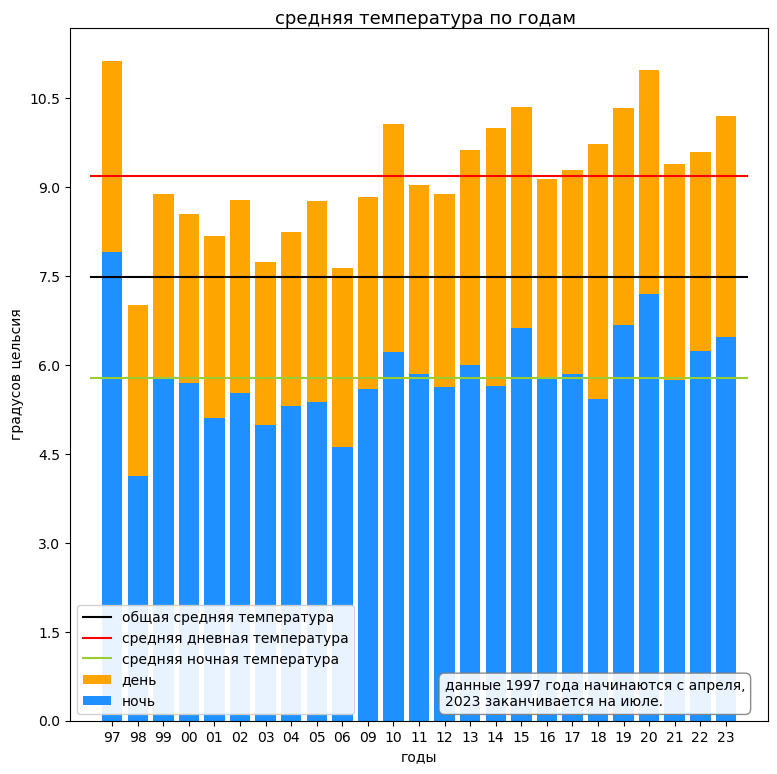

In [8]:
ytg = weather.groupby(['year']).agg({'t(day)': np.mean, 't(night)': np.mean}).round(2)
fig19 = plt.figure(figsize=(9, 9))
fig19.suptitle('средняя температура по годам',x=0.52,y=0.90, fontsize=13)
ax_ytg = fig19.add_subplot()
ax_ytg.bar(x=np.arange(len(ytg.index)), height=ytg['t(day)'], color='orange', label='день')
ax_ytg.bar(x=np.arange(len(ytg.index)), height=ytg['t(night)'], color='DodgerBlue', label='ночь')
ax_ytg.axhline(y=tmean.mean(), xmin=0.03, xmax=0.97, label='общая средняя температура', color='black')
ax_ytg.axhline(y=tmean['t(day)'], xmin=0.03, xmax=0.97, label='средняя дневная температура', color='red')
ax_ytg.axhline(y=tmean['t(night)'], xmin=0.03, xmax=0.97, label='средняя ночная температура', color='YellowGreen')
ax_ytg.xaxis.set_major_locator(FixedLocator(np.arange(len(ytg.index))))
ax_ytg.xaxis.set_major_formatter(FixedFormatter([str(i)[2:] for i in ytg.index]))
ax_ytg.yaxis.set_major_locator(MaxNLocator(10))
ax_ytg.set_xlabel('годы')
ax_ytg.set_ylabel('градусов цельсия')
ax_ytg.text(x=13, y=0.25, s='данные 1997 года начинаются с апреля,\n2023 заканчивается на июле.', 
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4', alpha=0.9))
ax_ytg.legend(loc=3, framealpha=0.9);

### 20. Средняя температура по месяцам

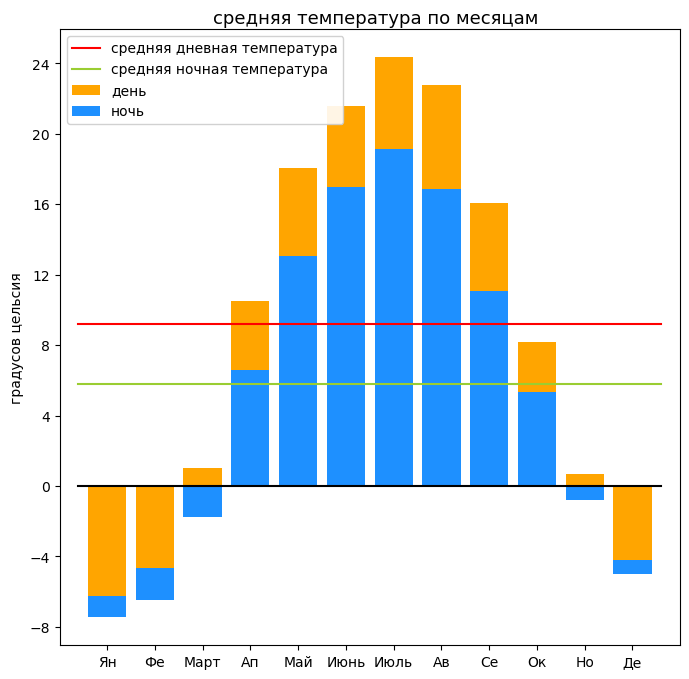

In [61]:
mtg = weather.groupby('month').agg({'t(day)':np.mean, 't(night)': np.mean}).round(2)
fig20 = plt.figure(figsize=(8, 8))
fig20.suptitle('средняя температура по месяцам',x=0.52,y=0.905, fontsize=13)
ax_mtg = fig20.add_subplot()
ax_mtg.bar(mtg.loc[np.arange(3, 12)].index, height=mtg['t(day)'].loc[np.arange(3, 12)], color='orange', label='день')
ax_mtg.bar(mtg.loc[np.arange(3, 12)].index, height=mtg['t(night)'].loc[np.arange(3, 12)], color='DodgerBlue', label='ночь')
ax_mtg.bar(mtg.loc[[1, 2, 12]].index, height=mtg['t(night)'].loc[[1, 2, 12]], color='DodgerBlue')
ax_mtg.bar(mtg.loc[[1, 2, 12]].index, height=mtg['t(day)'].loc[[1, 2, 12]], color='orange')
ax_mtg.axhline(y=0, xmin=0.03, xmax=0.97, color='black')
ax_mtg.axhline(y=tmean['t(day)'], xmin=0.03, xmax=0.97, label='средняя дневная температура', color='red')
ax_mtg.axhline(y=tmean['t(night)'], xmin=0.03, xmax=0.97, label='средняя ночная температура', color='YellowGreen')
ax_mtg.xaxis.set_major_locator(FixedLocator(mtg.index))
ax_mtg.xaxis.set_major_formatter(FixedFormatter([dictmonth[i]['a'] for i in mtg.index]))
ax_mtg.yaxis.set_major_locator(MaxNLocator(10))
ax_mtg.set_ylabel('градусов цельсия')
ax_mtg.legend(loc=2, framealpha=0.9);

### 21. Средняя температура по временам года

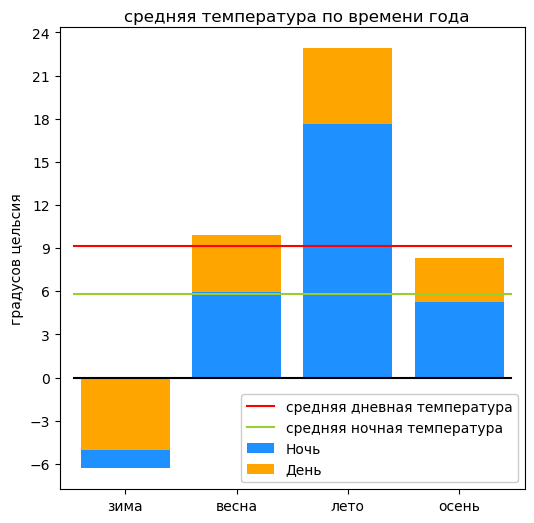

In [60]:
fig21 = plt.figure(figsize=(6, 6))
fig21.suptitle('средняя температура по времени года',x=0.52,y=0.91, fontsize=12)
ax_tsm = fig21.add_subplot()
num = 0
for i in range(-1, 11, 3):
    season = mtg.iloc[[i+j for j in range (3)]].mean().round(2)
    if season[0] > 0 and season[1] > 0:
        ax_tsm.bar(seasons[num], height=season[0], color='orange')
        ax_tsm.bar(seasons[num], height=season[1], color='DodgerBlue')
    elif season[0] < 0 and season[1] < 0:
        ax_tsm.bar(seasons[num], height=season[1], color='DodgerBlue', label='Ночь')
        ax_tsm.bar(seasons[num], height=season[0], color='orange', label='День')
    num += 1
ax_tsm.axhline(y=0, xmin=0.03, xmax=0.97, color='black')
ax_tsm.axhline(y=tmean['t(day)'], xmin=0.03, xmax=0.97, label='средняя дневная температура', color='red')
ax_tsm.axhline(y=tmean['t(night)'], xmin=0.03, xmax=0.97, label='средняя ночная температура', color='YellowGreen')
ax_tsm.yaxis.set_major_locator(MaxNLocator(11))
ax_tsm.set_ylabel('градусов цельсия')
ax_tsm.legend(loc=4, framealpha=1);